In [7]:
import random
from time import perf_counter
import datetime
import retroactive_queue
import matplotlib.pyplot as plt

n_values = 1000000 # number of values to insert in the queue

batchs = [100, 200, 400, 800, 1600, 3200, 6400] # batch sizes to test

n_iterations = 6 # number of iterations to average the results, 4 is the most common value

In [2]:
# NOT the best way to generate random datetime objects, but we aren't measuring this, this is just random test data
def generate_random_test_data(n_elements):
    list_datetime = [0]*n_elements
    list_string = [0]*n_elements
    # generate n random datetime objects

    for i in range(n_elements):
        year = random.randint(2000, 2020)
        month = random.randint(1, 12)
        day = random.randint(1, 28)
        hour = random.randint(0, 23)
        minute = random.randint(0, 59)
        second = random.randint(0, 59)
        microsecond = random.randint(0, 999999)

        list_datetime[i] = datetime.datetime(year, month, day, hour, minute, second, microsecond)
    
    # generate n random strings
    for i in range(n_elements):
        list_string[i] = random.randint(0, 1000000)
    
    # merge so [time, value]
    for i in range(n_elements):
        list_datetime[i] = [list_datetime[i], list_string[i]]

    return list_datetime

mother_list = generate_random_test_data(1000000)

for i in range(1, 10):
    print(mother_list[random.randint(0, 1000000)])


[datetime.datetime(2002, 11, 17, 9, 30, 9, 311042), 559094]
[datetime.datetime(2006, 1, 10, 23, 9, 40, 572962), 923260]
[datetime.datetime(2019, 1, 6, 3, 10, 35, 984675), 823238]
[datetime.datetime(2004, 2, 22, 1, 0, 21, 399467), 908211]
[datetime.datetime(2007, 2, 28, 1, 1, 17, 511377), 52161]
[datetime.datetime(2017, 6, 16, 5, 49, 58, 153983), 113970]
[datetime.datetime(2015, 7, 3, 13, 59, 50, 476350), 352520]
[datetime.datetime(2001, 5, 27, 1, 41, 19, 416947), 169588]
[datetime.datetime(2019, 6, 25, 11, 43, 29, 858004), 237083]


In [3]:
def push_performance(batch_size):
    
    start = perf_counter()

    # push(random datetime, any value)
    for i in range(n_iterations): 
        queue = retroactive_queue.queue(datetime.datetime(2023, 1, 1, 12, 0, 0), "a")
        
        # push n elements
        for j in range(batch_size):
            queue.push(mother_list[j][0], mother_list[j][1])
        
        # reset queue
        queue = None
    
    end = perf_counter()
    
    return (end - start) / n_iterations

def pop_performance(batch_size):
    
    start = perf_counter()
    aux = 0

    # push(random datetime, any value)
    for i in range(n_iterations): 
        queue = retroactive_queue.queue(datetime.datetime(2023, 1, 1, 12, 0, 0), "a")
        
        # push n elements to pop later, don't measure this time
        aux1 = perf_counter()
        for j in range(batch_size):
            queue.push(mother_list[j][0], mother_list[j][1])
        aux2 = perf_counter()
        aux += aux2 - aux1 # time to push n elements, discard this time

        # pop n elements
        for j in range(batch_size):
            queue.pop(mother_list[-j][0])
        
        # reset queue
        queue = None
    
    end = perf_counter()
    
    return (end - start) / n_iterations

In [4]:
def evaluate_performance():
    push_results = []
    pop_results = []

    for batch in batchs:
        push_time = push_performance(batch)
        pop_time = pop_performance(batch)
        
        push_results.append(push_time)
        pop_results.append(pop_time)
        
        print(f"Batch size: {batch}")
        print(f"push time: {push_time}")
        print(f"pop time: {pop_time}")

    return push_results, pop_results

In [5]:
push_results, pop_results = evaluate_performance()

Batch size: 100
push time: 0.00164878333453089
pop time: 0.008042583319668969
Batch size: 200
push time: 0.0024835499934852123
pop time: 0.01862099999561906
Batch size: 400
push time: 0.005321999992399166
pop time: 0.06606776666982721
Batch size: 800
push time: 0.009689000008317331
pop time: 0.272522316663526
Batch size: 1600
push time: 0.024317066670240212
pop time: 1.0219770499970764
Batch size: 3200
push time: 0.042008849986207984
pop time: 5.247005883332652
Batch size: 6400
push time: 0.08908333332510665
pop time: 24.56173060000098


looks like time for pop isn't as good as I thought, definitely has something to do with the inorder traversal search of the tree

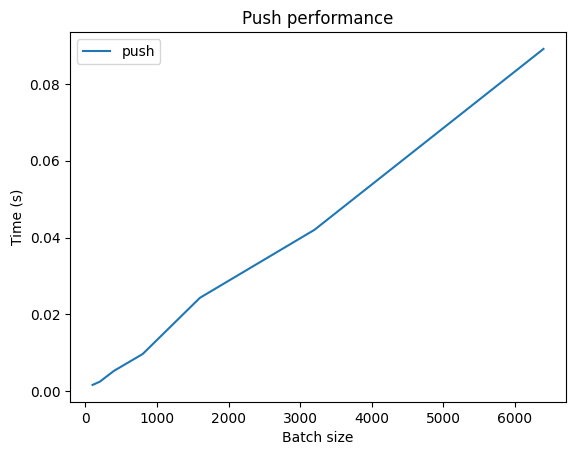

In [11]:
# plot push_results, pop_results

plt.plot(batchs, push_results, label="push")
plt.xlabel("Batch size")
plt.ylabel("Time (s)")
plt.title("Push performance")
plt.legend()
plt.show()

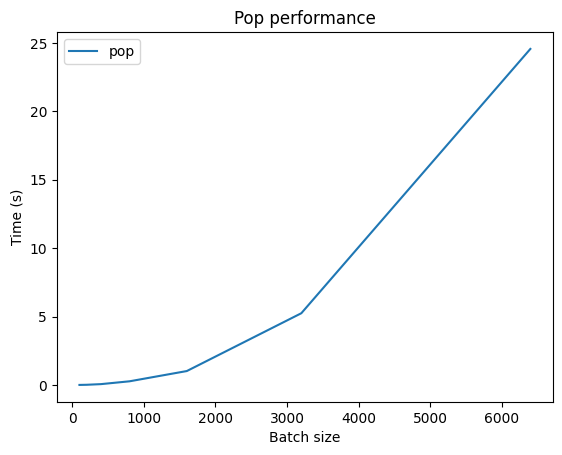

In [12]:
plt.plot(batchs, pop_results, label="pop")
plt.xlabel("Batch size")
plt.ylabel("Time (s)")
plt.title("Pop performance")
plt.legend()
plt.show()